# Assignment 6 Weather

# Knock airport Weather

# Create a notebook called assignment_6_Weather.ipynb


# Part 1.


# Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

Plot:

    The temperature
    The mean temperature each day
    The mean temperature for each month




In [ ]:
import pandas as pd
import io
import requests

url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# Download raw text from the url provided
r = requests.get(url)
r.raise_for_status()
text = r.text

# check the first 40 lines of the text data


print("\n".join(text.splitlines()[:40]))






Station Name: KNOCK AIRPORT
Station Height: 201 M 
Latitude:53.906  ,Longitude: -8.817


date:  -  Date and Time (utc)
rain:  -  Precipitation Amount (mm)	  
temp:  -  Air Temperature (C)	
wetb:  -  Wet Bulb Temperature (C)
dewpt: -  Dew Point Temperature (C)             
rhum:  -  Relative Humidity (%)
vappr: -  Vapour Pressure (hPa)	 
msl:   -  Mean Sea Level Pressure (hPa)
wdsp:  -  Mean Wind Speed (knot)
wddir: -  Predominant Wind Direction (degree)
ww:    -  Synop code for Present Weather
w:     -  Synop code for Past Weather
sun:   -  Sunshine duration (hours)
vis:   -  Visibility (m)
clht:  -  Cloud height (100's of ft) - 999 if none 
clamt: -  Cloud amount
ind:   -  Indicator

date,ind,rain,ind,temp,ind,wetb,dewpt,vappr,rhum,msl,ind,wdsp,ind,wddir,ww,w,sun,vis,clht,clamt
10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,

In [ ]:
# to skip all lines tht start with # and any blank lines

filtered = "\n".join(
    line for line in text.splitlines()
    if not line.startswith("#") and line.strip()
)

df = pd.read_csv(
    io.StringIO(filtered),
    engine="python",
    on_bad_lines="skip"   # <-- THIS replaces error_bad_lines
)

print(df.head())
print(df.columns)
print(df.shape)

                                        Station Name: KNOCK AIRPORT
Station Height: 201 M                                              
Latitude:53.906                                   Longitude: -8.817
date:  -  Date and Time (utc)                                  None
rain:  -  Precipitation Amount (mm)\t                          None
temp:  -  Air Temperature (C)\t                                None
wetb:  -  Wet Bulb Temperature (C)                             None
Index(['Station Name: KNOCK AIRPORT'], dtype='object')
(18, 1)


C:\Users\Cheryl\AppData\Local\Temp\ipykernel_19640\1626321412.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=25, header=None)
C:\Users\Cheryl\AppData\Local\Temp\ipykernel_19640\1626321412.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["datetime"] = pd.to_datetime(df["datetime"])


            datetime  col1 col2  col3  temp  col5  dewpt  col7  col8  col9  \
0  31-jul-1996 08:00     0  0.0     0  11.5     0   11.1  10.7   0.0     0   
1  31-jul-1996 09:00     0  0.0     0  11.6     0   10.7   9.8   0.0     0   
2  31-jul-1996 10:00     0  0.0     0  12.9     0   11.3   9.8   0.0     0   
3  31-jul-1996 11:00     0  0.0     0  14.5     0   10.8   7.0   0.0     0   
4  31-jul-1996 12:00     0  0.0     0  14.4     0   10.9   7.3   0.0     0   

   ... col11  col12 col13  col14 col15 col16 col17  col18 col19 col20  
0  ...     0      0     0      0    25    82   0.0  40000    45     5  
1  ...     0      0     0      0    80    81   0.0   8000    32     7  
2  ...     0      0     0      0    25    82   0.0  28000    35     6  
3  ...     0      0     0      0     2    11   0.0  40000    40     6  
4  ...     0      0     0      0     1    82   0.0  40000    43     6  

[5 rows x 21 columns]


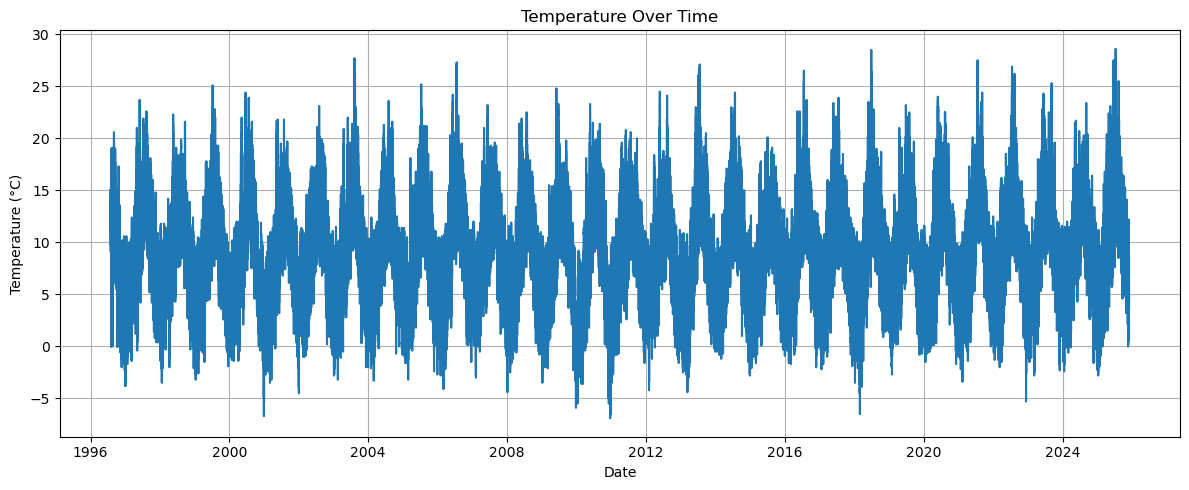

In [25]:
import matplotlib.pyplot as plt

df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=25, header=None)

# Based on your data sample, column layout looks like:
# 0 = date/time
# 1–? = other fields
# 4 = temperature (C)

df.columns = [
    "datetime", "col1", "col2", "col3", "temp", "col5", "dewpt",
    "col7", "col8", "col9", "msl", "col11", "col12", "col13",
    "col14", "col15", "col16", "col17", "col18", "col19", "col20"
]


print(df.head())


# Convert datetime column
df["datetime"] = pd.to_datetime(df["datetime"])

# --- Plot temperature only ---
plt.figure(figsize=(12,5))
plt.plot(df["datetime"], df["temp"])
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# to get the daily mean 

# Convert datetime
df["datetime"] = pd.to_datetime(df["datetime"])

# Create a date-only column
df["date"] = df["datetime"].dt.date

# Compute daily mean temperature
daily_mean = df.groupby("date")["temp"].mean()

print(daily_mean)








date
1996-07-31    12.650000
1996-08-01    11.666667
1996-08-02    12.504167
1996-08-03    14.266667
1996-08-04    13.987500
                ...    
2025-11-27    10.633333
2025-11-28     6.666667
2025-11-29     4.200000
2025-11-30     3.858333
2025-12-01     8.400000
Name: temp, Length: 10716, dtype: float64


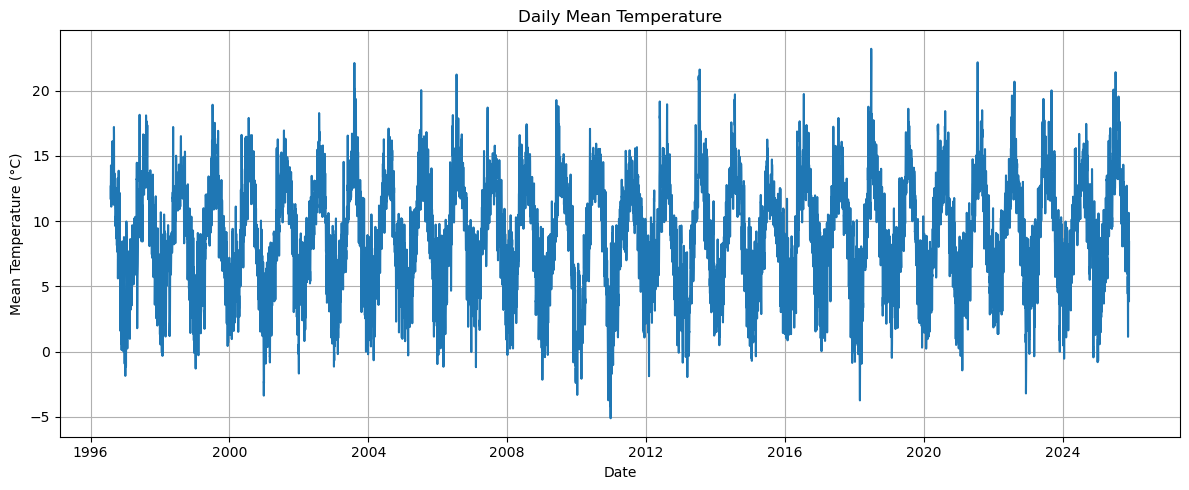

In [30]:
# to plot the data for mean temp each day

plt.figure(figsize=(12,5))
plt.plot(daily_mean.index, daily_mean.values)
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.title("Daily Mean Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Cheryl\AppData\Local\Temp\ipykernel_19640\840622524.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df["temp"].resample("M").mean()


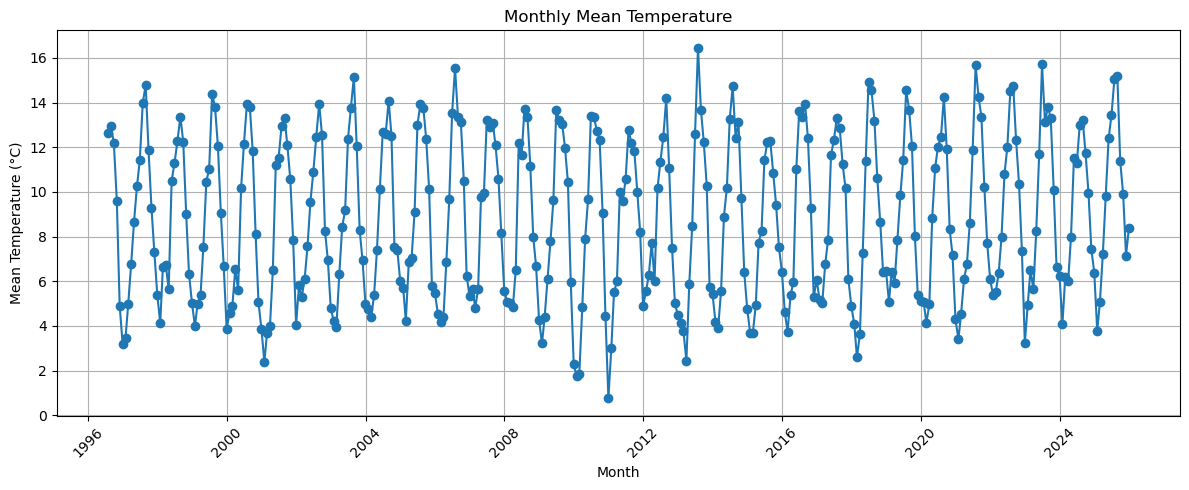

In [ ]:
# for mean temperature for each month

df["datetime"] = pd.to_datetime(df["datetime"])

# Resample to monthly mean
df.set_index("datetime", inplace=True)      # set datetime as index
monthly_mean = df["temp"].resample("M").mean()

# to plot bt matplotlib
plt.figure(figsize=(12,5))
plt.plot(monthly_mean.index, monthly_mean.values, marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.title("Monthly Mean Temperature")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Part 2.

Plot:

    The Windspeed (there is data missing from this column)
    The rolling windspeed (say over 24 hours)
    the max windspeed for each day
    The monthly mean of the daily max winds


In [ ]:
## The Windspeed


import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=25, header=None)

# Assign column names
df.columns = [
    "datetime", "col1", "col2", "col3", "temp", "col5", "dewpt",
    "wind_speed", "col9", "col10", "msl", "col12", "col13", "col14",
    "col15", "col16", "col17", "col18", "col19", "col20", "col21"
]

# Convert datetime
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

# Compute daily mean wind speed
daily_wind_mean = df["wind_speed"].resample("D").mean()


C:\Users\Cheryl\AppData\Local\Temp\ipykernel_19640\1379691621.py:5: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=25, header=None)
C:\Users\Cheryl\AppData\Local\Temp\ipykernel_19640\1379691621.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["datetime"] = pd.to_datetime(df["datetime"])


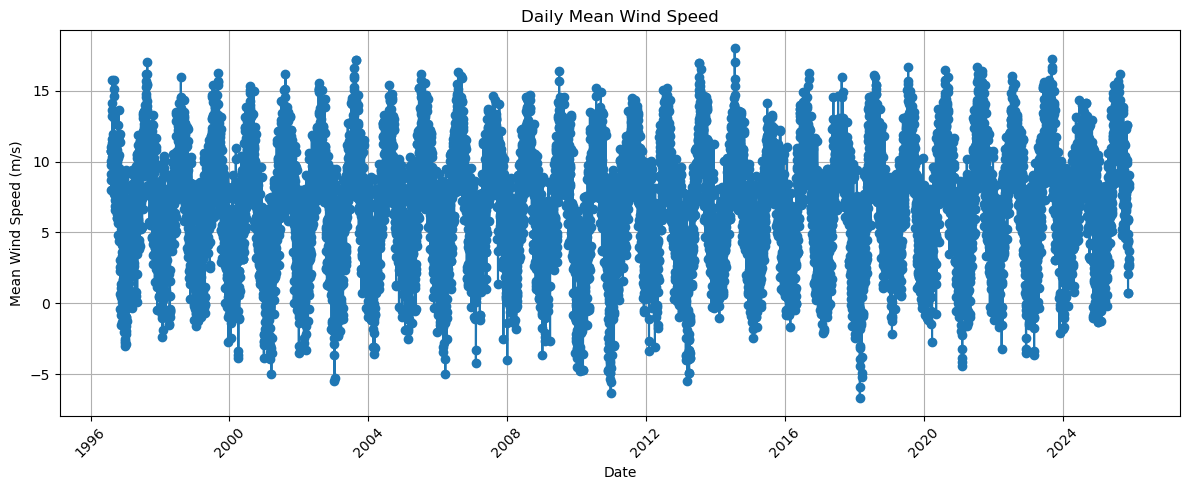

In [37]:
# Plot
plt.figure(figsize=(12,5))
plt.plot(daily_wind_mean.index, daily_wind_mean.values, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Mean Wind Speed (m/s)")
plt.title("Daily Mean Wind Speed")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

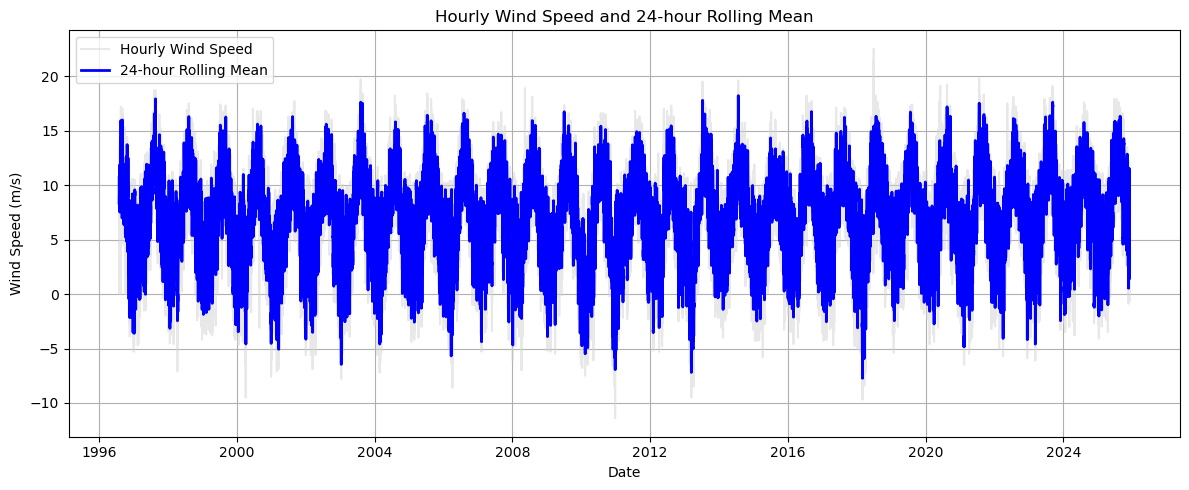

In [ ]:

## The rolling windspeed over 24 hours

# Ensure numeric values 
df["wind_speed"] = pd.to_numeric(df["wind_speed"], errors='coerce')

# Compute 24-hour rolling mean
rolling_wind = df["wind_speed"].rolling(window=24, min_periods=1).mean()

# and now to plot 

# Plot
plt.figure(figsize=(12,5))
plt.plot(df.index, df["wind_speed"], color='lightgray', alpha=0.5, label="Hourly Wind Speed")
plt.plot(df.index, rolling_wind, color='blue', linewidth=2, label="24-hour Rolling Mean")
plt.xlabel("Date")
plt.ylabel("Wind Speed (m/s)")
plt.title("Hourly Wind Speed and 24-hour Rolling Mean")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

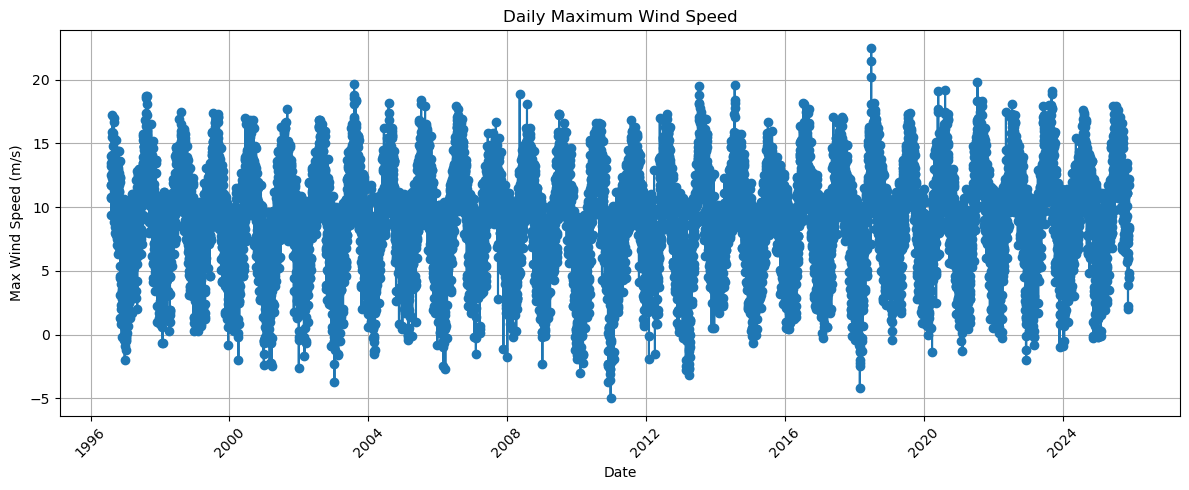

In [ ]:
## max windspeed for each day 

daily_max_wind = df["wind_speed"].resample("D").max()

# --- Plot ---
plt.figure(figsize=(12,5))
plt.plot(daily_max_wind.index, daily_max_wind.values, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Max Wind Speed (m/s)")
plt.title("Daily Maximum Wind Speed")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Cheryl\AppData\Local\Temp\ipykernel_19640\967248173.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_max_wind = daily_max_wind.resample("M").mean()


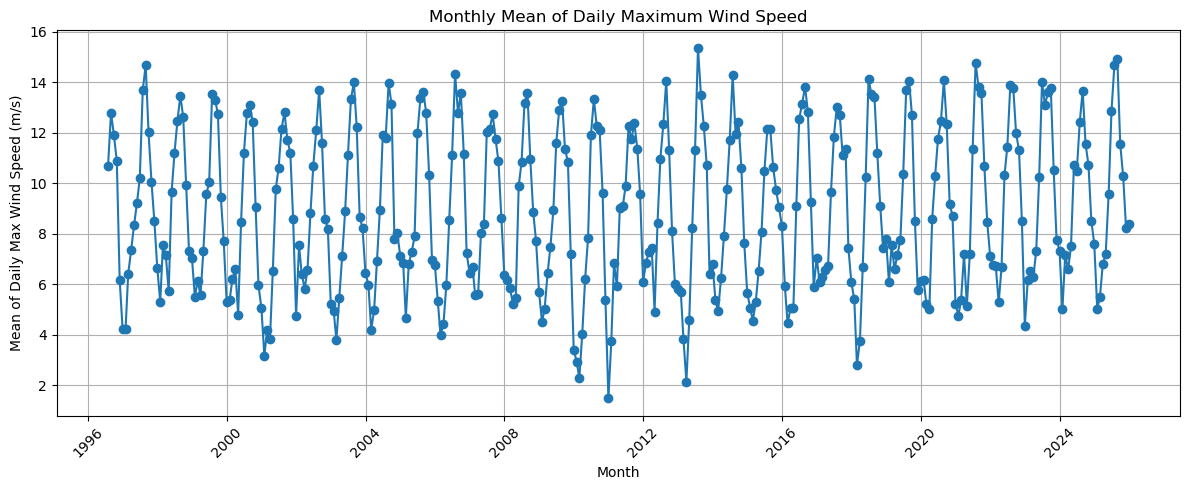

In [ ]:
## The monthly mean of the daily max winds

# Step 1: Compute daily maximum wind speed 
daily_max_wind = df["wind_speed"].resample("D").max()

# Step 2: Compute monthly mean of daily maxima
monthly_mean_max_wind = daily_max_wind.resample("M").mean()

# and now to plot 

plt.figure(figsize=(12,5))
plt.plot(monthly_mean_max_wind.index, monthly_mean_max_wind.values, marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Mean of Daily Max Wind Speed (m/s)")
plt.title("Monthly Mean of Daily Maximum Wind Speed")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

References :

 W3schools (2025) matplotlib pyplot (online) available from:  https://www.w3schools.com/python/matplotlib_pyplot.asp
 [accessed 7 December 2025].
 
 Chatgpt - prompt- how to get rid of the # lines and any blank lines, available from: https://chatgpt.com/c/693620cb-1fb4-8328-b17e-6f5f9cd20626, [accessed 7 December 2025].

 Chatgpt - prompt- how to plot tempurature alone with matplotlib, available from : https://chatgpt.com/c/693620cb-1fb4-8328-b17e-6f5f9cd20626, [accessed 8 December 2025].

 andrew beatty leacture video and notebook  (2025) Programming for data analytics,  manipulating time series.

 Chatgpt-prompt- https://chatgpt.com/c/693629d0-a584-832a-9adb-481dabd8ce01, [accessed 8 december 2025].

 Chatgpt - prompt- The monthly mean of the daily max winds, Available from: https://chatgpt.com/c/693629d0-a584-832a-9adb-481dabd8ce01 [ accessed 8 December 2025].

 

 